# Background Subtraction
In this notebook, it has been tried to subtract background from the original image. The first attempt was not
successfull. Main problem is that whem we subtract an image from another, it can lead to changes on the target
objects. 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg  
import matplotlib.colors as clr
import numpy as np 
import cv2 as cv
from scipy import ndimage as nd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

Text(0.5, 1.0, 'Background')

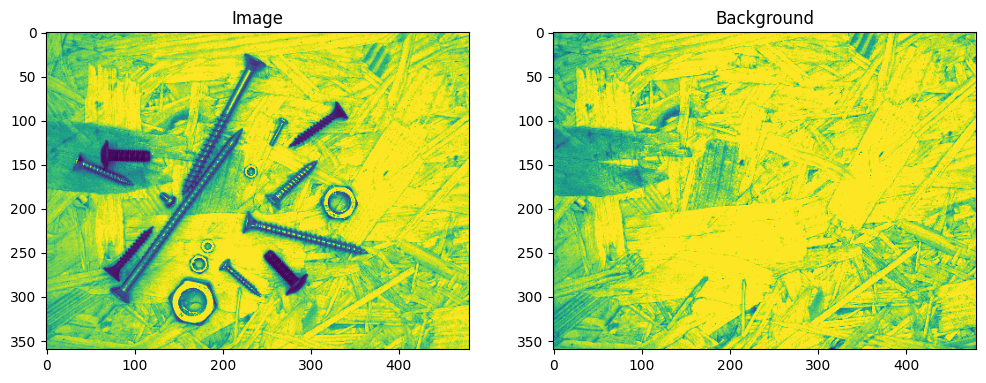

In [32]:
img = cv.imread("test_data/screws_075.png")
bckgrnd = cv.imread("test_data/img_001027.png")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_rgb = img_rgb[:,:,0]
img_rgb= cv.resize(img_rgb, (480, 360))
bckgrnd = cv.cvtColor(bckgrnd, cv.COLOR_BGR2RGB)
bckgrnd = bckgrnd[:,:,0]
bckgrnd= cv.resize(bckgrnd, (480, 360))
#bckgrnd = nd.rotate(bckgrnd, 180)
#gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
#gray = cv.medianBlur(gray,3)


fig, axs = plt.subplots(1,2)
axs[0].imshow(img_rgb)
axs[0].set_title('Image')
axs[1].imshow(bckgrnd)
axs[1].set_title('Background')

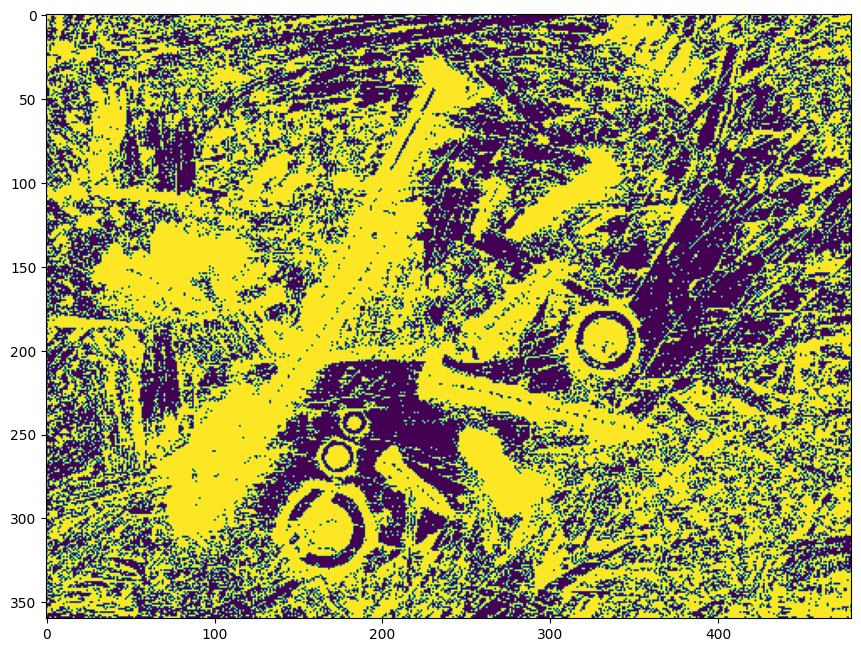

In [43]:
backSub = cv.createBackgroundSubtractorMOG2()
fgMask = backSub.apply(bckgrnd)
fgMask = backSub.apply(img_rgb)
plt.imshow(fgMask)

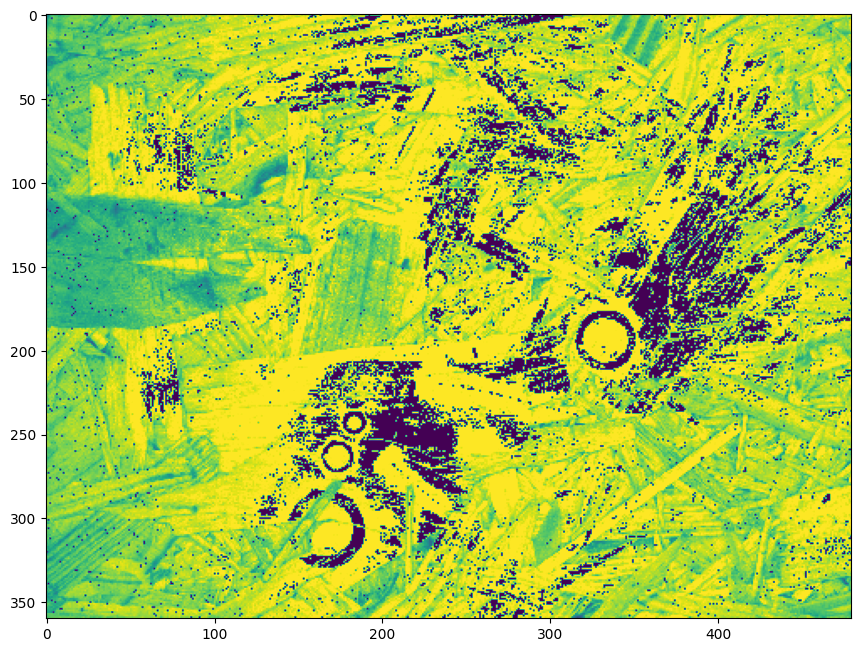

In [31]:
#img_rgb = np.uint8(img_rgb)
a = np.ones(360)
b = np.ones(480)
for i,h in enumerate(a):
    for j,k in enumerate(b):
        if (img_rgb[i,j] != bckgrnd[i,j]):
            img_rgb[i,j] = bckgrnd[i,j]
        else:
            img_rgb[i,j] = img_rgb[i,j] - bckgrnd[i,j]
#unknown = cv.subtract(img_rgb, bckgrnd)

plt.imshow(img_rgb)